In [ ]:
pip install ultralytics

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.1 MB/s eta 0:00:00


In [ ]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

In [ ]:
!unzip /BoneFractureDetect.zip

Streaming output truncated to the last 5000 lines.
  inflating: bone fracture detection.v4-v4.yolov8/train/images/image1_772_png.rf.adde56ed57f692ff1b335283a9970be8.jpg  
  inflating: bone fracture detection.v4-v4.yolov8/train/images/image1_773_png.rf.4822ae8f774d60e4cf30be96dcb0ae3f.jpg  
  inflating: bone fracture detection.v4-v4.yolov8/train/images/image1_773_png.rf.57de4c6ab164ebbdcd49f444b58cc513.jpg  
  inflating: bone fracture detection.v4-v4.yolov8/train/images/image1_773_png.rf.6ab81fda032158749cd9a194bd5eb09f.jpg  
  inflating: bone fracture detection.v4-v4.yolov8/train/images/image1_779_png.rf.1926381e1da24746d818f8388c600d88.jpg  
  inflating: bone fracture detection.v4-v4.yolov8/train/images/image1_779_png.rf.5866c009b5ef16defe1c32bb19a709bd.jpg  
  inflating: bone fracture detection.v4-v4.yolov8/train/images/image1_779_png.rf.b2a39c6ed37f06a032a5a7c2c28db8cb.jpg  
  inflating: bone fracture detection.v4-v4.yolov8/train/images/image1_77_png.rf.2c5fb557123366afa6f4377ee91a6

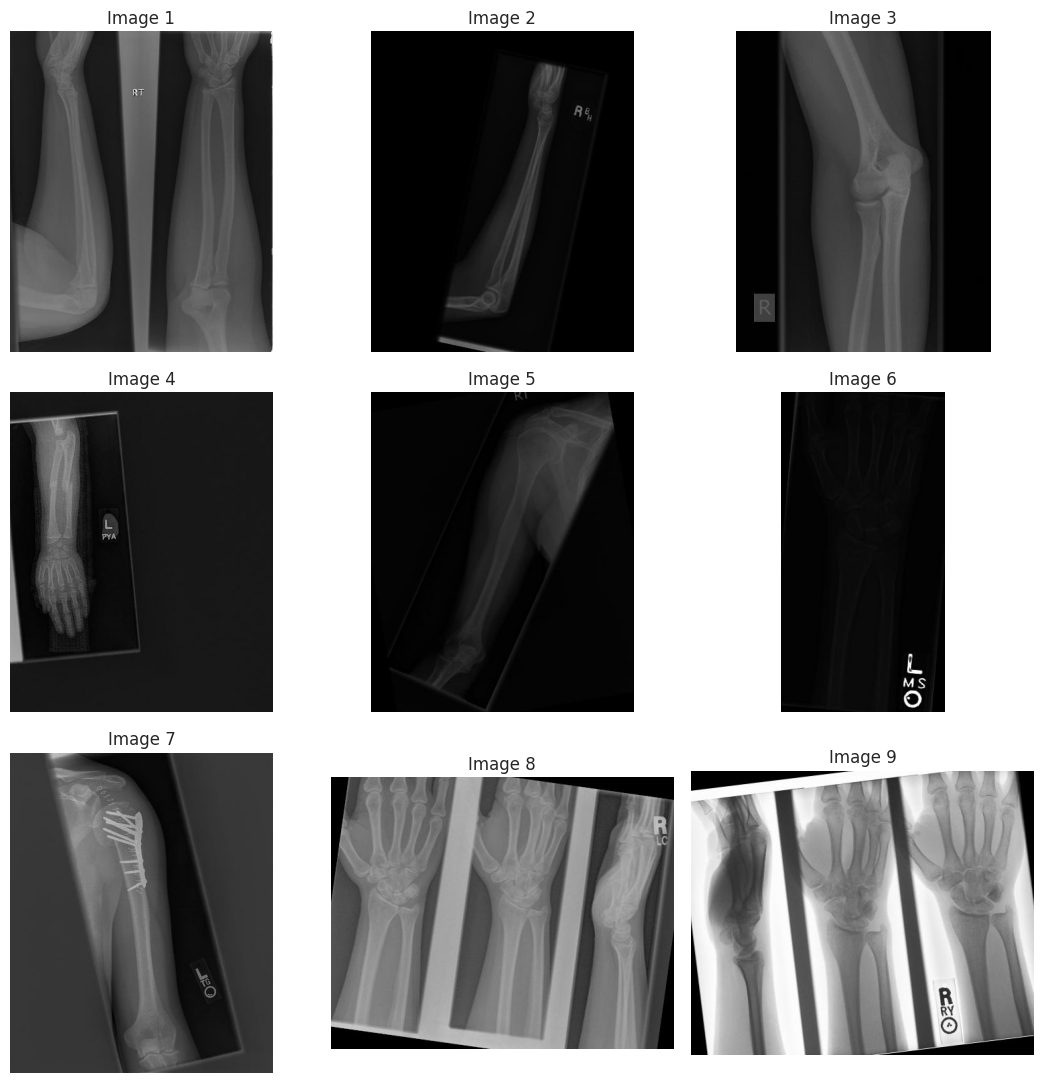

In [ ]:
Image_dir = '/content/BoneFractureYolo8/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Get the size of the image
image = cv2.imread("/content/BoneFractureYolo8/train/images/distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 1024x1024 and 3 channels.


100%|██████████| 6.25M/6.25M [00:00<00:00, 78.4MB/s]



image 1/1 /content/BoneFractureYolo8/train/images/distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.jpg: 640x640 (no detections), 8.0ms
Speed: 14.6ms preprocess, 8.0ms inference, 165.9ms postprocess per image at shape (1, 3, 640, 640)


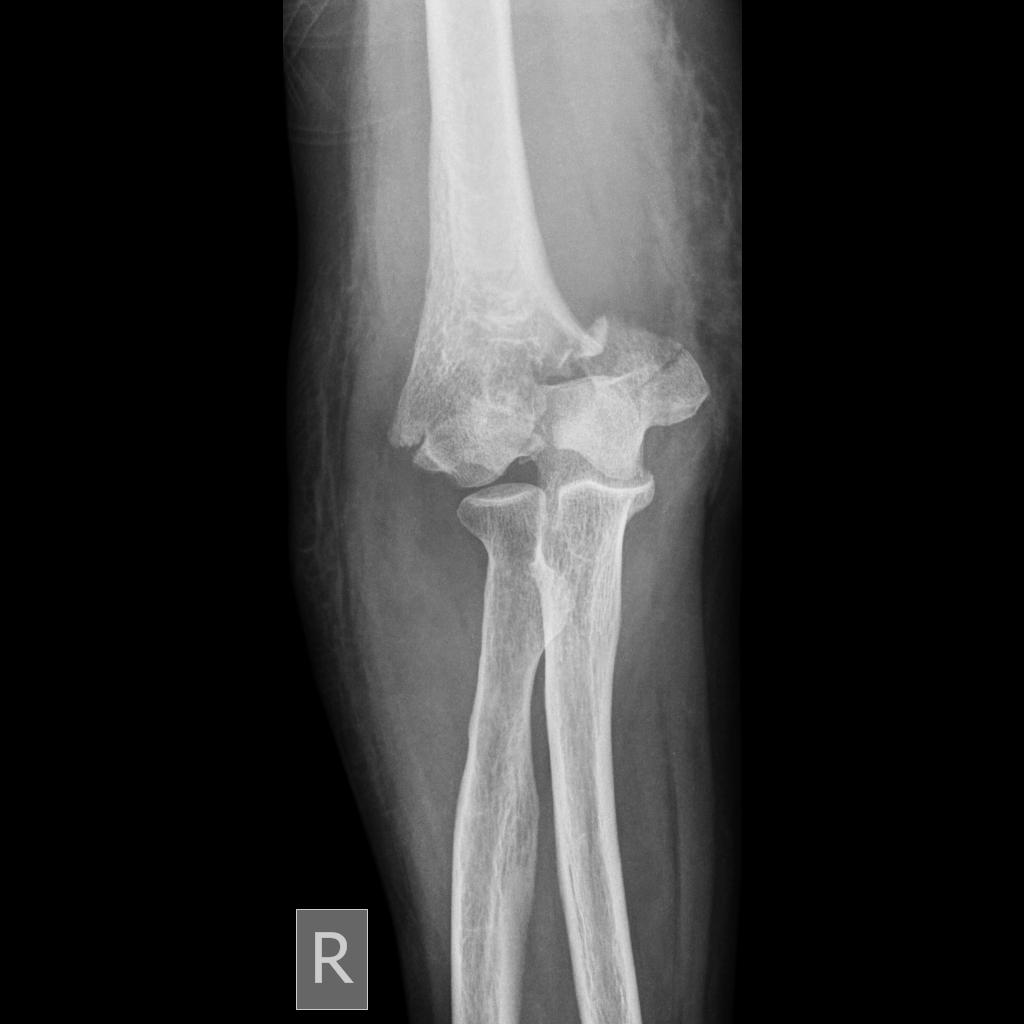

In [ ]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/BoneFractureYolo8/train/images/distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
!pip install --upgrade ultralytics ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 12.5 MB/s eta 0:00:00


In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/BoneFractureYolo8/data.yaml",epochs = 30, batch = -1, optimizer = 'auto')

Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/BoneFractureYolo8/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 14.7MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 66.9MB/s]

WARNING ⚠️ yolo11n.pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.4s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

AMP: checks failed ❌. Anomalies were detected with AMP on your system that may lead to NaN losses or zero-mAP results, so AMP will be disabled during training.
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.75G total, 0.10G reserved, 0.05G allocated, 14.60G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2691573       6.949         0.375         35.99         198.6        (1, 3, 640, 640)                    list
     2691573        13.9         0.602         20.74         65.94        (2, 3, 640, 640)                    list
     2691573       27.79         1.078         20.87         56.15        (4, 3, 640, 640

train: Scanning /content/BoneFractureYolo8/train/labels... 3631 images, 1827 backgrounds, 0 corrupt: 100%|██████████| 3631/3631 [00:01<00:00, 1920.35it/s]


train: New cache created: /content/BoneFractureYolo8/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/BoneFractureYolo8/valid/labels... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<00:00, 1205.83it/s]


val: New cache created: /content/BoneFractureYolo8/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.000515625), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         8G      2.788      7.085      2.311          0        640: 100%|██████████| 111/111 [01:24<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.01s/it]

                   all        348        204   0.000678      0.322    0.00135   0.000329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      7.89G       2.51      5.553      1.974          1        640: 100%|██████████| 111/111 [01:19<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.81it/s]


                   all        348        204      0.336      0.107     0.0258    0.00624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      7.88G      2.387      4.539       1.94          0        640: 100%|██████████| 111/111 [01:25<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.47it/s]


                   all        348        204     0.0206      0.098     0.0114    0.00238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      7.98G      2.372      3.959      1.947          0        640: 100%|██████████| 111/111 [01:19<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]


                   all        348        204      0.304     0.0563     0.0299    0.00794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      7.86G      2.376      3.634      1.979          1        640: 100%|██████████| 111/111 [01:21<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        348        204      0.322      0.102      0.083     0.0298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      7.98G      2.232      3.283      1.869          0        640: 100%|██████████| 111/111 [01:17<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.58it/s]

                   all        348        204      0.254     0.0879     0.0706     0.0251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      7.88G      2.196      3.146      1.855          0        640: 100%|██████████| 111/111 [01:17<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]

                   all        348        204      0.605     0.0919     0.0926     0.0329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      7.98G      2.141      2.977      1.821          0        640: 100%|██████████| 111/111 [01:18<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]

                   all        348        204      0.151      0.155      0.106     0.0385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.87G      2.117      2.825      1.803          0        640: 100%|██████████| 111/111 [01:17<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        348        204       0.18       0.22      0.154     0.0575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.98G      2.106      2.713      1.791          2        640: 100%|██████████| 111/111 [01:20<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all        348        204      0.383      0.209      0.176     0.0568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      7.88G      2.077      2.614      1.764          2        640: 100%|██████████| 111/111 [01:16<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.07it/s]

                   all        348        204      0.206      0.193      0.149     0.0542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      7.98G      1.983      2.442      1.707          0        640: 100%|██████████| 111/111 [01:17<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        348        204      0.231      0.257      0.184     0.0704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30       7.9G      1.948      2.453      1.696          0        640: 100%|██████████| 111/111 [01:19<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]


                   all        348        204      0.304      0.252      0.229     0.0785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.98G      1.965      2.346      1.695          2        640: 100%|██████████| 111/111 [01:15<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]

                   all        348        204       0.24      0.257      0.204     0.0738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.88G      1.905       2.27      1.665          0        640: 100%|██████████| 111/111 [01:14<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all        348        204      0.313       0.19      0.193     0.0687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.98G      1.885      2.189      1.631          1        640: 100%|██████████| 111/111 [01:16<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]

                   all        348        204      0.328       0.21      0.212     0.0705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30       7.9G      1.861      2.111      1.627          2        640: 100%|██████████| 111/111 [01:16<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        348        204      0.297      0.296       0.26     0.0965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.99G      1.814      2.017      1.582          0        640: 100%|██████████| 111/111 [01:19<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]

                   all        348        204      0.257      0.265      0.208     0.0757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.96G      1.791      1.974      1.587          0        640: 100%|██████████| 111/111 [01:18<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        348        204      0.279      0.278      0.222     0.0909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.91G      1.765      1.897      1.546          1        640: 100%|██████████| 111/111 [01:17<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all        348        204      0.364      0.278       0.25     0.0945


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.95G      1.727      1.773      1.606          0        640: 100%|██████████| 111/111 [01:18<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]


                   all        348        204      0.301      0.251      0.253     0.0914

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.88G      1.669      1.701      1.601          1        640: 100%|██████████| 111/111 [01:13<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all        348        204      0.328      0.281      0.261     0.0963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.97G       1.59      1.556      1.543          0        640: 100%|██████████| 111/111 [01:13<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        348        204      0.391      0.219       0.24      0.082



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      7.86G      1.613      1.543      1.538          1        640: 100%|██████████| 111/111 [01:13<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all        348        204      0.295      0.313      0.278      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.95G      1.554      1.485      1.514          2        640: 100%|██████████| 111/111 [01:12<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]


                   all        348        204      0.323      0.263      0.236     0.0843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.87G      1.514      1.411      1.499          2        640: 100%|██████████| 111/111 [01:12<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        348        204      0.306      0.278      0.254     0.0869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      7.95G      1.481      1.319      1.442          2        640: 100%|██████████| 111/111 [01:12<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        348        204      0.282      0.266      0.234     0.0824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      7.87G      1.455      1.261      1.432          2        640: 100%|██████████| 111/111 [01:10<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all        348        204      0.348      0.221      0.245       0.09



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.95G      1.399      1.199      1.402          1        640: 100%|██████████| 111/111 [01:10<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        348        204      0.365      0.262      0.262     0.0925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      7.86G      1.391       1.19      1.389          2        640: 100%|██████████| 111/111 [01:11<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        348        204       0.37      0.283      0.262     0.0988



30 epochs completed in 0.684 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,685,733 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]


                   all        348        204      0.296      0.314      0.278      0.105
        elbow positive         28         29      0.182      0.138     0.0595     0.0156
      fingers positive         41         48      0.265      0.333      0.265     0.0631
      forearm fracture         37         43       0.45      0.535      0.498      0.229
               humerus         31         36      0.627      0.528      0.577      0.218
     shoulder fracture         19         20      0.206      0.312      0.245     0.0965
        wrist positive         17         28     0.0461     0.0357     0.0242    0.00743
Speed: 1.6ms preprocess, 3.6ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train


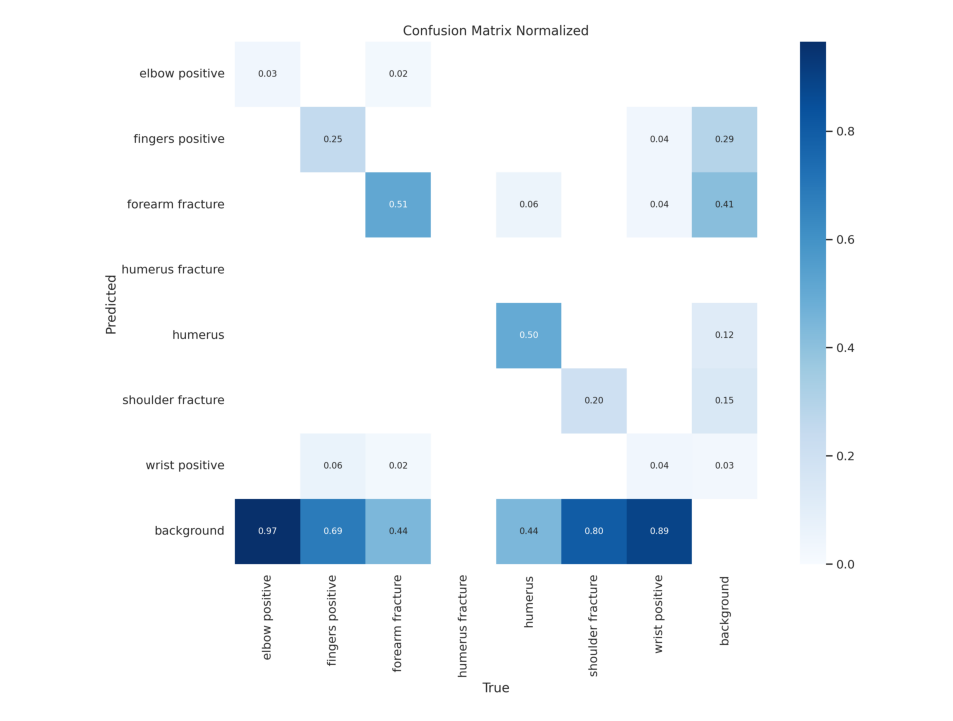

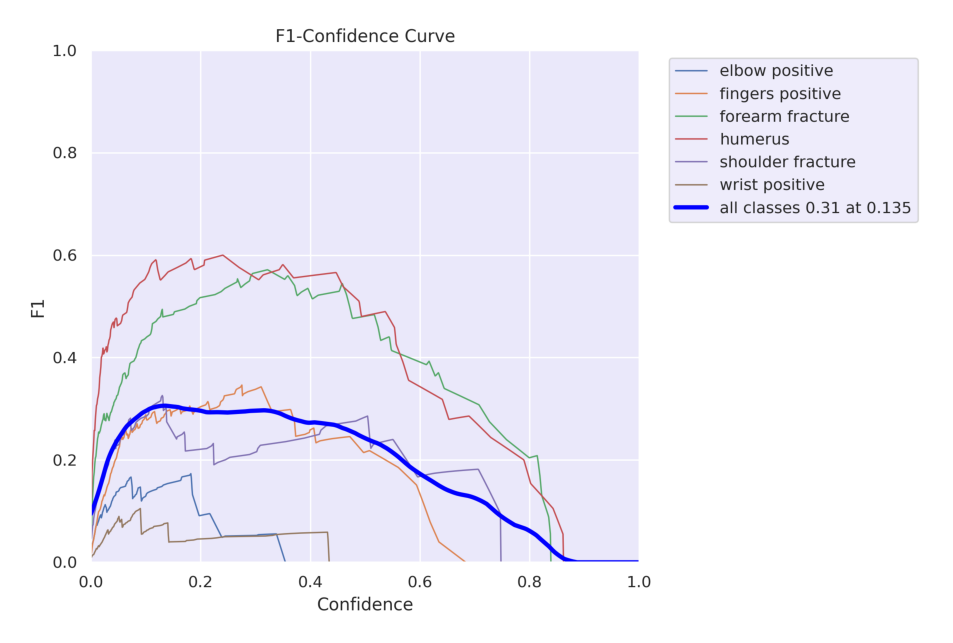

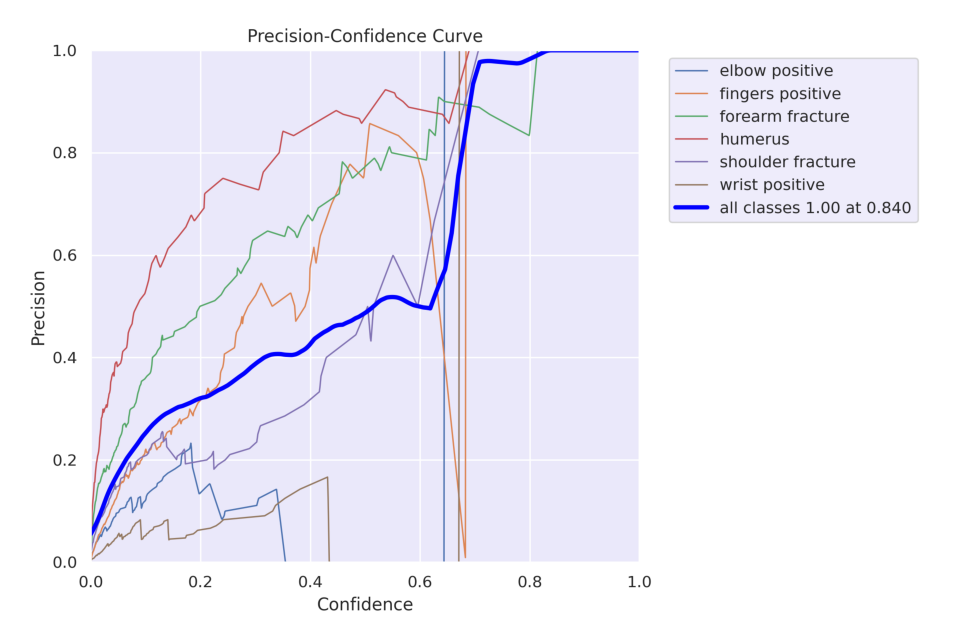

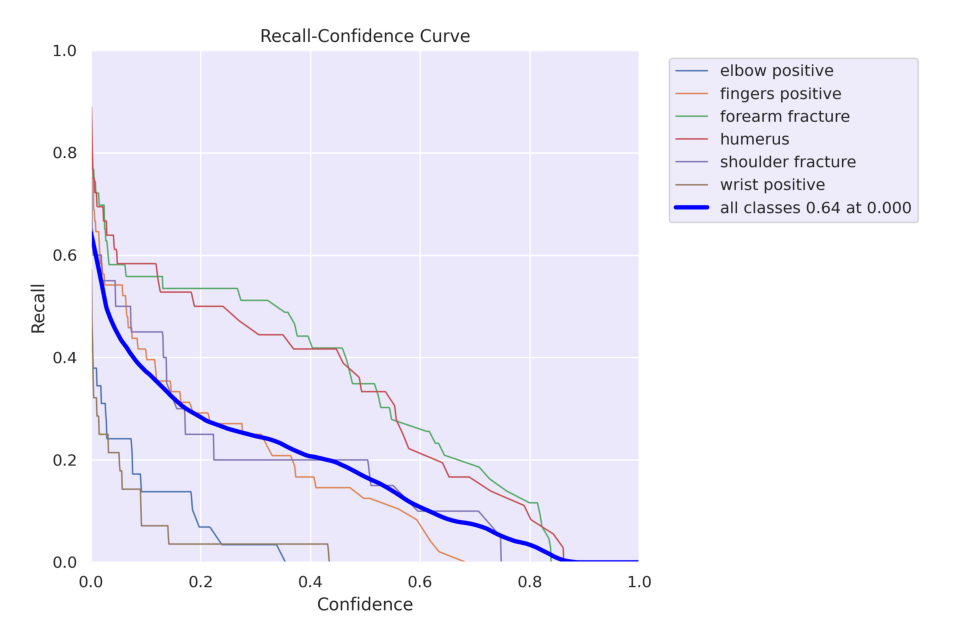

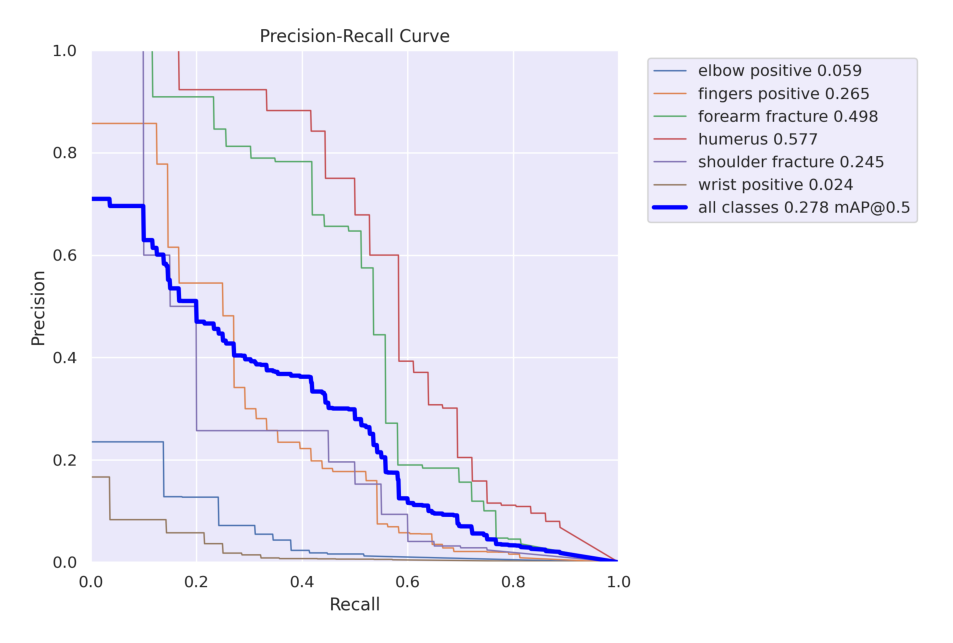

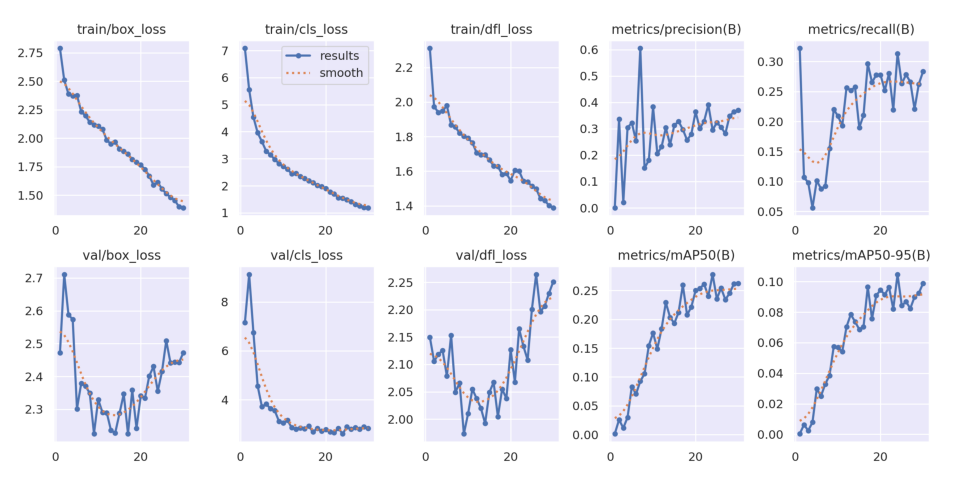

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/content/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)

In [ ]:
Result_Final_model = pd.read_csv('/content/runs/detect/train/results.csv')
Result_Final_model.tail(10)

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
20,21,1.7269,1.7727,1.6058,0.30120,0.25150,0.25347,0.09142,2.3343,2.6884,2.0677,0.000309,0.000309,0.000309
21,22,1.6689,1.7006,1.6012,0.32836,0.28051,0.26137,0.09632,2.4014,2.6508,2.1649,0.000279,0.000279,0.000279
22,23,1.5903,1.5559,1.5430,0.39073,0.21950,0.24038,0.08202,2.4303,2.8251,2.1333,0.000249,0.000249,0.000249
23,24,1.6125,1.5431,1.5375,0.29549,0.31343,0.27810,0.10472,2.3550,2.6080,2.1080,0.000219,0.000219,0.000219
24,25,1.5541,1.4849,1.5138,0.32319,0.26313,0.23578,0.08427,2.4152,2.8927,2.2006,0.000189,0.000189,0.000189
25,26,1.5145,1.4106,1.4987,0.30594,0.27808,0.25434,0.08689,2.5090,2.7920,2.2644,0.000159,0.000159,0.000159
26,27,1.4809,1.3188,1.4422,0.28159,0.26615,0.23435,0.08238,2.4409,2.8573,2.1965,0.000129,0.000129,0.000129
27,28,1.4551,1.2610,1.4316,0.34820,0.22080,0.24534,0.08996,2.4434,2.8046,2.2063,0.000099,0.000099,0.000099
28,29,1.3987,1.1994,1.4019,0.36462,0.26231,0.26155,0.09246,2.4425,2.8970,2.2295,0.000069,0.000069,0.000069
29,30,1.3906,1.1902,1.3891,0.37043,0.28331,0.26230,0.09882,2.4718,2.8353,2.2506,0.000039,0.000039,0.000039


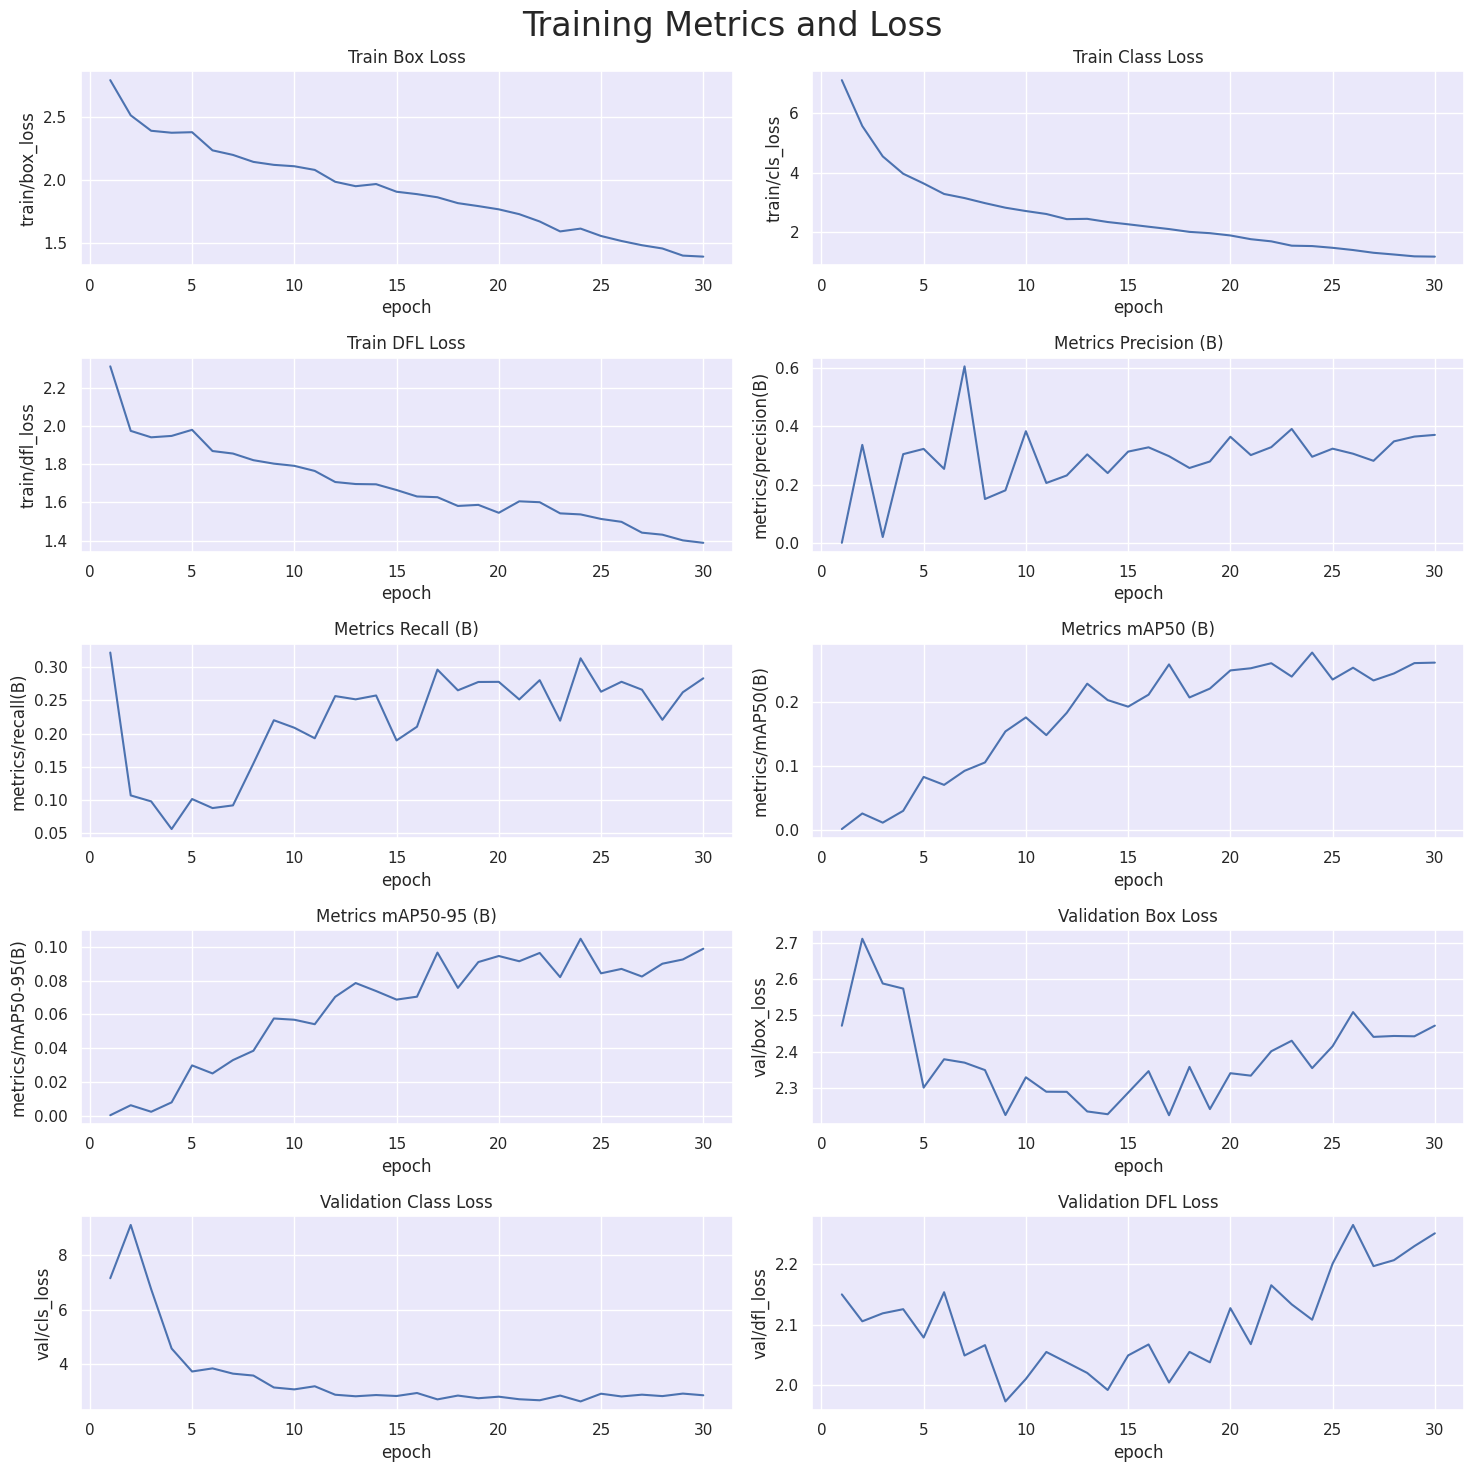

In [ ]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [ ]:
# Loading the best performing model
Valid_model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,685,733 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /content/BoneFractureYolo8/valid/labels.cache... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.59it/s]


                   all        348        204      0.301      0.304      0.269      0.102
        elbow positive         28         29      0.212      0.138     0.0612     0.0158
      fingers positive         41         48      0.275      0.312      0.226      0.058
      forearm fracture         37         43      0.445      0.535        0.5      0.231
               humerus         31         36       0.64      0.556      0.556      0.199
     shoulder fracture         19         20      0.185       0.25      0.244     0.0992
        wrist positive         17         28     0.0494     0.0357     0.0264    0.00753
Speed: 0.4ms preprocess, 7.7ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/val
precision(B):  0.30096802810395556
metrics/recall(B):  0.30443076611380543
metrics/mAP50(B):  0.26900134351695987
metrics/mAP50-95(B):  0.10162284401115154



0: 640x640 (no detections), 7.5ms
Speed: 2.3ms preprocess, 7.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.2ms
Speed: 2.8ms preprocess, 7.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.2ms
Speed: 3.0ms preprocess, 7.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.2ms
Speed: 2.8ms preprocess, 7.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


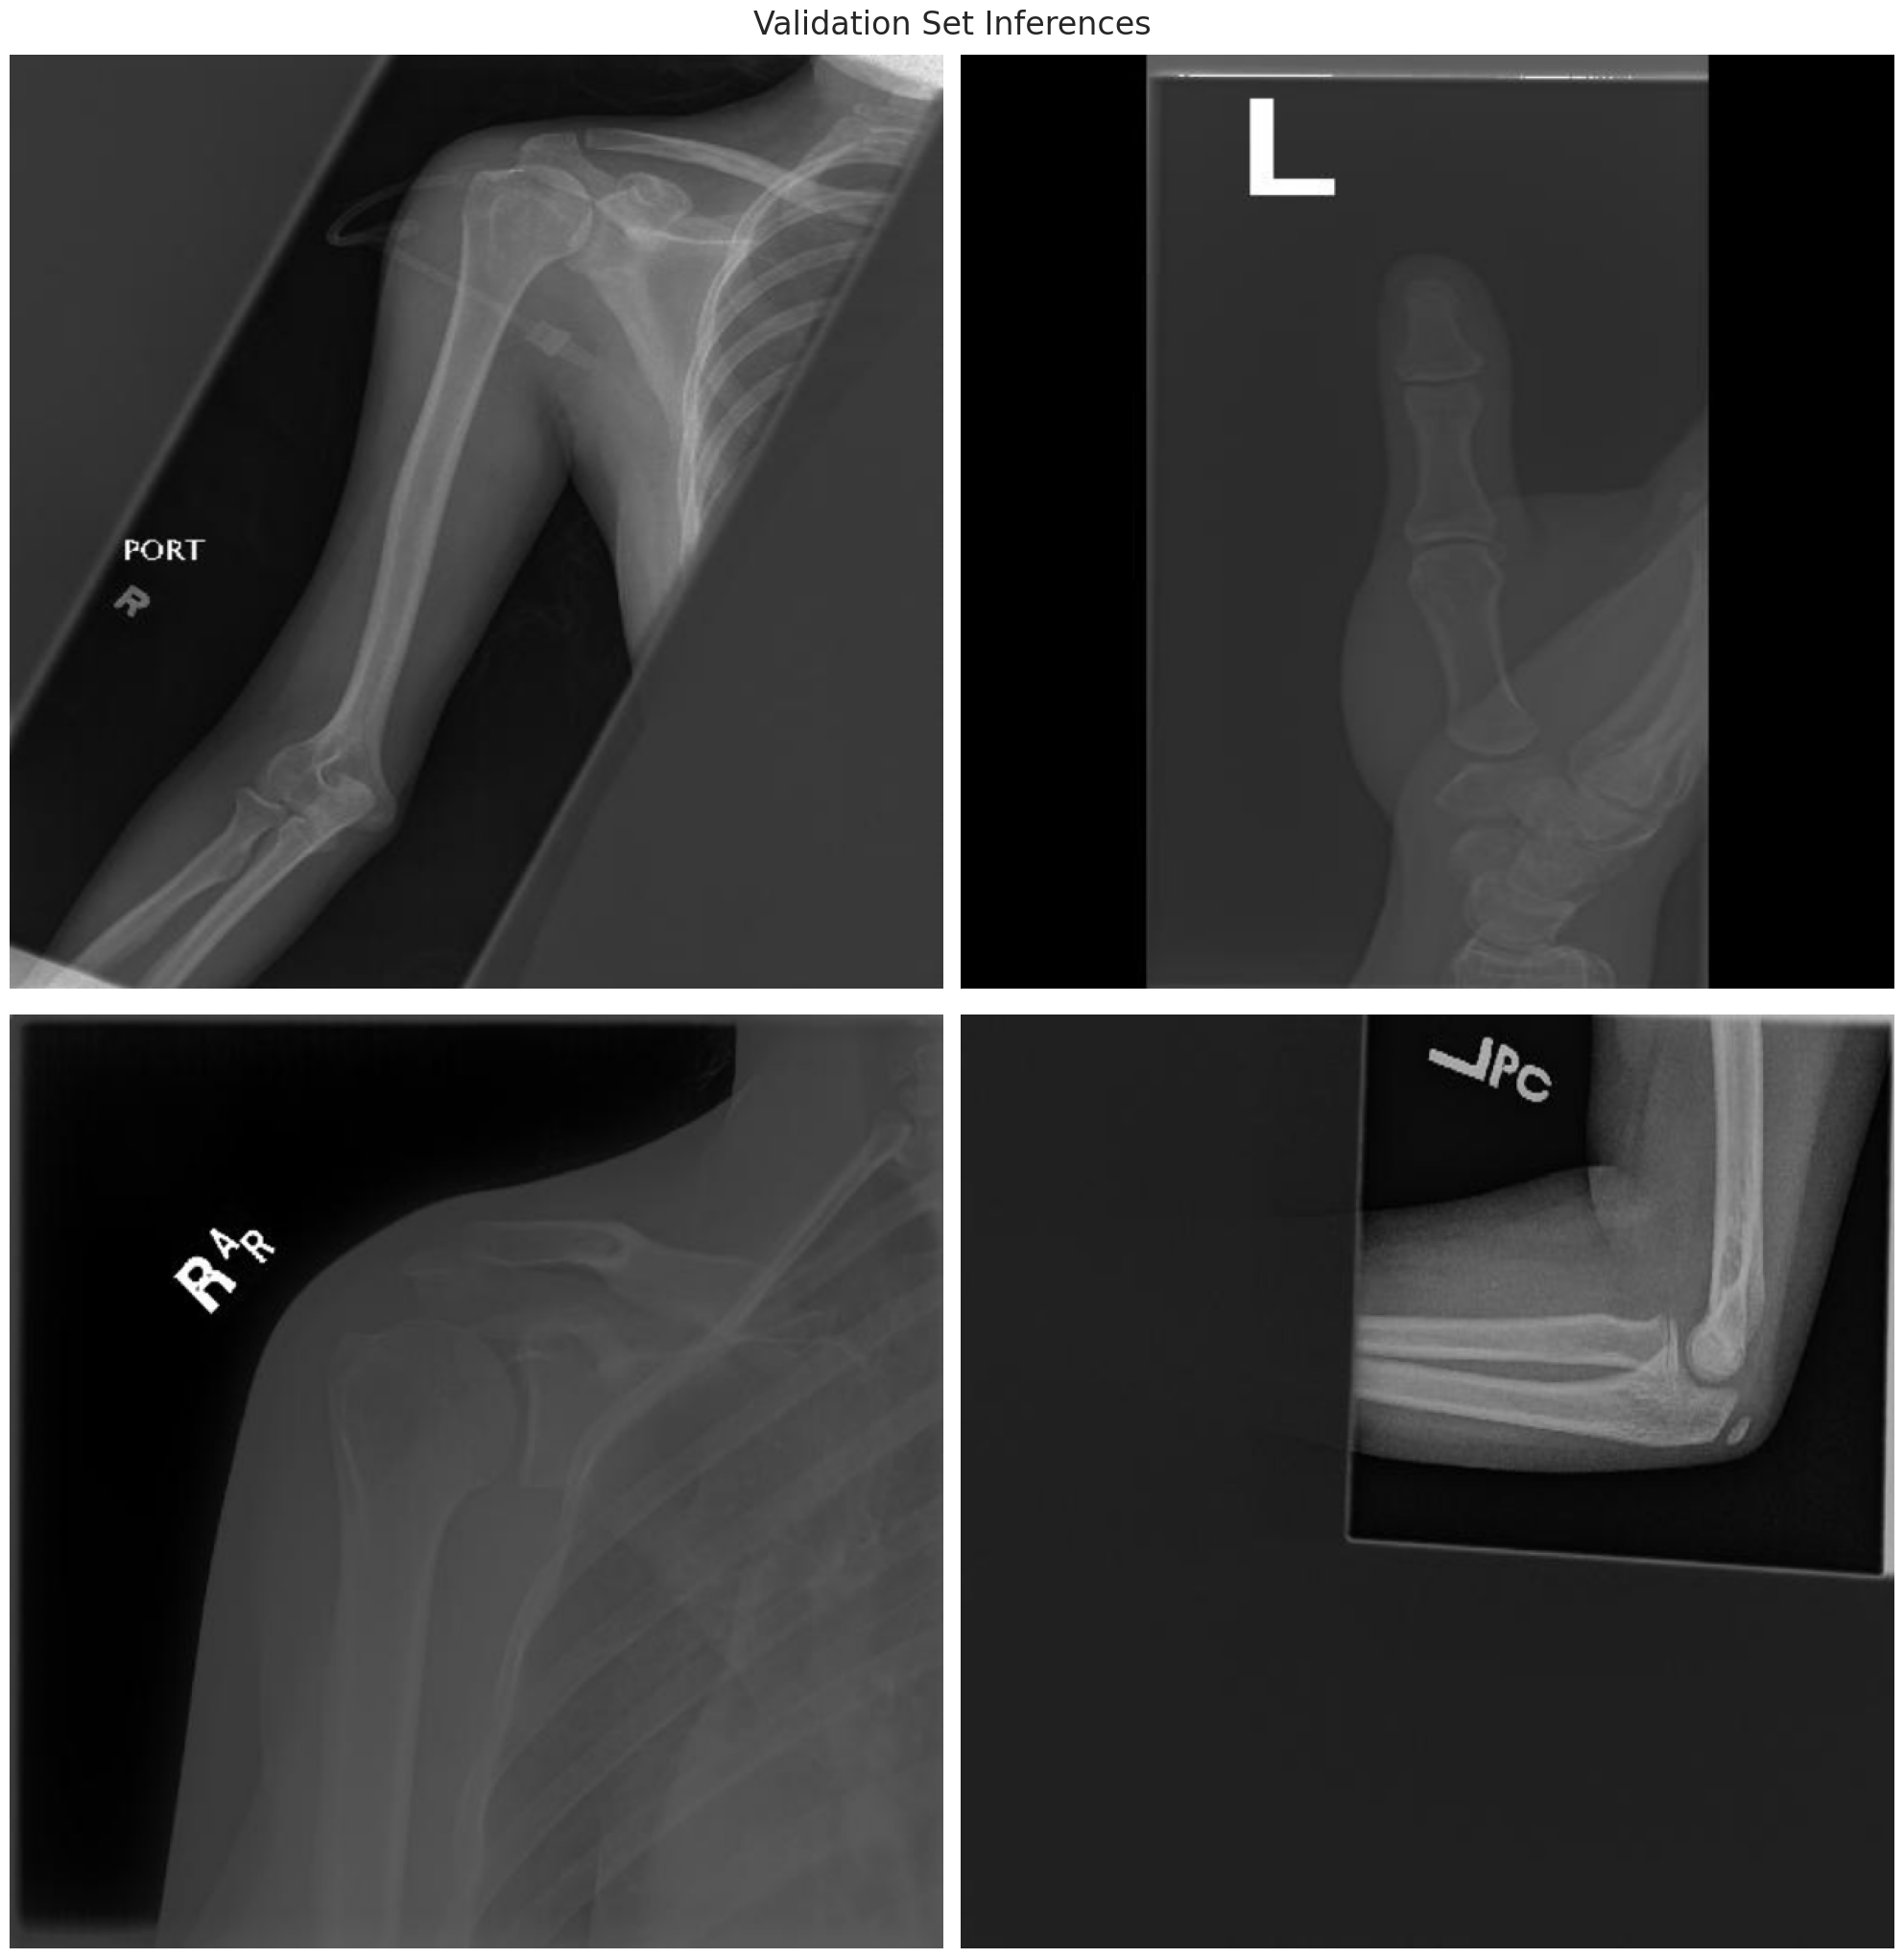

In [ ]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/content/BoneFractureYolo8/valid'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 random images
    selected_images = random.sample(image_files, min(4, len(image_files)))

    # Prepare subplots
    fig, axes = plt.subplots(2, 2, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            # Load image
            image = cv2.imread(image_path)

            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)

                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()